In [1]:
import matplotlib.pyplot as plt
import numpy as np 

So we are going to render the parameter space of quadratic maps : 
$ z \mapsto z^2 + c $.

The code will demonstrate the (sometimes obscure) power of numpy.
In particular we'll use boolean masks to avoid recalculating values unnecessarily.

We'll split things up across 3 cells corresponding to the 3 phases in the process:

1. initialisation
2. iteration
1. display


### Initialisation

Set up the grid of points in $\mathbb{C}$.
I normally use uppercase for np.ndarrays
when they are "just" numbers. 

In [21]:
npts = 100
max_iter = 20

X = np.linspace(-2, 1, 2*npts)
Y = np.linspace(-1, 1, npts)

#broadcast the xs to a square array
C = X[:, None] + 1J*Y
#initial value is always zero
Z = np.zeros_like(C)

exit_times = max_iter*np.ones(C.shape, np.int32)
mask = new_mask = exit_times > 0


### Iterations

This is the traditional iteration except that we are doing it for an array of points and not a single point. 
In other words we are inverting the usual order if the code were in C

In [22]:
for k in range(max_iter):
    #use XOR to detect the area which has changed
    exit_times[mask ^ new_mask] = k
    Z[mask] = Z[mask] * Z[mask] + C[mask]
    new_mask, mask = abs(Z) < 5, new_mask
    

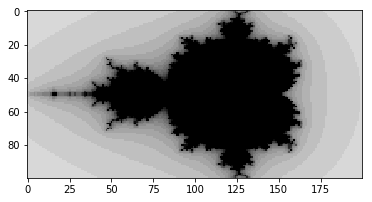

In [23]:
#r,g,b layers are all the same
image = np.stack((exit_times,)*3).T
#choose a coloring scheme now
image = 1 - image/max_iter

plt.imshow(image)

In [14]:
(5,)*5

(5, 5, 5, 5, 5)

So let's compare it with some other code from 
https://rosettacode.org/wiki/Mandelbrot_set#Python

1.6621665954589844


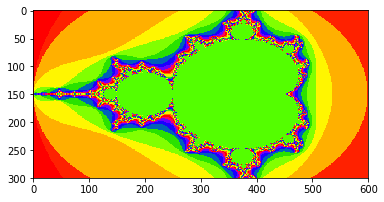

In [48]:
import matplotlib.pyplot as plt
import numpy as np

npts = 300
max_iter = 100

start = time.time()

X = np.linspace(-2, 1, 2*npts)
Y = np.linspace(-1, 1, npts)

#broadcast X to a square array
C = X[:, None] + 1J*Y
#initial value is always zero
Z = np.zeros_like(C)

exit_times = max_iter*np.ones(C.shape, np.int32)
mask = new_mask = exit_times > 0

for k in range(max_iter):
    #use XOR to detect the area which has changed
    exit_times[mask ^ new_mask] = k
    Z[mask] = Z[mask] * Z[mask] + C[mask]
    new_mask, mask = abs(Z) < 2, new_mask

print(time.time() - start)
plt.imshow(exit_times.T,cmap=plt.cm.prism)

This is the nearest match 

- the nested loop that we avoid is outside the function m()
- the loop inside m() is o


7.144559144973755


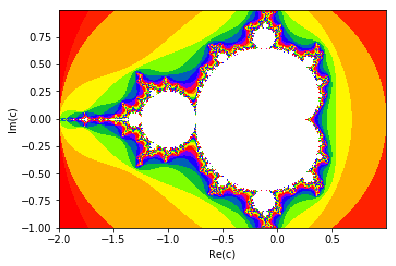

In [49]:
from pylab import *
from numpy import NaN

import time
 
def m(a):
	z = 0
	for n in range(1, 100):
		z = z**2 + a
		if abs(z) > 2:
			return n
	return NaN

start = time.time()
 
X = arange(-2, 1, .01)
Y = arange(-1,  1, .01)
Z = zeros((len(Y), len(X)))
 
for iy, y in enumerate(Y):
	for ix, x in enumerate(X):
		Z[iy,ix] = m(x + 1j * y)
        
print(time.time() - start)
 
imshow(Z, cmap = plt.cm.prism, interpolation = 'none', extent = (X.min(), X.max(), Y.min(), Y.max()))
xlabel("Re(c)")
ylabel("Im(c)")
savefig("mandelbrot_python.svg")
show()


In [13]:
1.68/0.0684201717376709

24.55416227894416

In [44]:
import math
 
def mandelbrot(z , c , n=40):
    if abs(z) > 5:
        return float("nan")
    elif n > 0:
        return mandelbrot(z ** 2 + c, c, n - 1) 
    else:
        return z ** 2 + c
 
print("\n".join(["".join(["#" if not math.isnan(mandelbrot(0, x + 1j * y).real) else " "
                 for x in [a * 0.02 for a in range(-80, 30)]]) 
                 for y in [a * 0.05 for a in range(-20, 20)]])
     )
 

                                                                                #                             
                                                                                                              
                                                                                                              
                                                                          ##                                  
                                                                     ###########                              
                                                                    ############                              
                                                                      #########                               
                                                            ##   # ############  # #   #                      
                                                    ###### # ########################### #                    
 

In [29]:
X.shape

(600,)

In [42]:
7.1/1.69

4.201183431952662